In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import pvtools as pv

%matplotlib notebook

/home/jspringer/Workspace/ml/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<IPython.core.display.Javascript object>


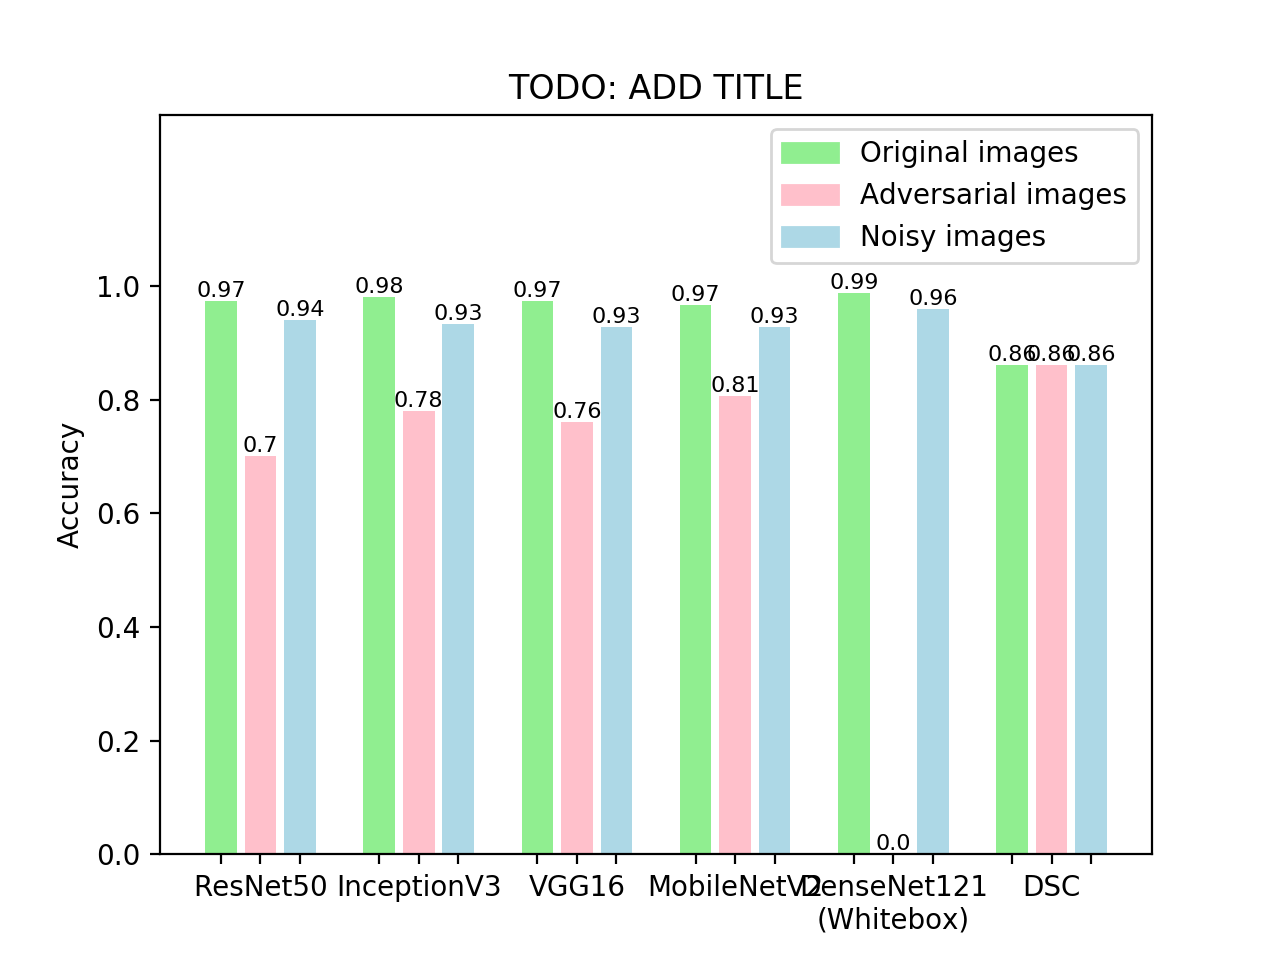

Text(0.5,1,'TODO: ADD TITLE')

In [64]:
fig, ax = plt.subplots()

all_data = np.array([0.9733333333333334, 0.7, 0.94, 
                     0.98, 0.78, 0.9333333333333333, 
                     0.9733333333333334, 0.76, 0.9266666666666666, 
                     0.9666666666666667, 0.8066666666666666, 0.9266666666666666,
                     0.9866666666666667, 0.00, 0.96,
                     0.86, 0.86, 0.86])

ind = np.arange(len(all_data))
for i in range(1, 6):
    ind[i*3:(i+1)*3] += i

bars = plt.bar(ind, all_data)
for i in range(6):
    b, a, n = bars[i*3:(i+1)*3]
    b.set_facecolor('lightgreen')
    a.set_facecolor('pink')
    n.set_facecolor('lightblue')
    
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{:02}'.format(round(height * 100) / 100), ha='center', va='bottom', fontdict={'size': 8})
    
ax.set_yticks(np.arange(6) / 5)
ax.set_xticks(ind)
ax.set_xticklabels(['', 'ResNet50', '', 
                    '', 'InceptionV3', '',
                    '', 'VGG16', '', 
                    '', 'MobileNetV2', '', 
                    '', 'DenseNet121\n(Whitebox)', '',
                    '', 'DSC', ''])
plt.ylabel('Accuracy')

original_patch = mpatches.Patch(color='lightgreen', label='Original images')
adversarial_patch = mpatches.Patch(color='pink', label='Adversarial images')
noisy_patch = mpatches.Patch(color='lightblue', label='Noisy images')
plt.legend(handles=[original_patch, adversarial_patch, noisy_patch])
plt.ylim(0, 1.3)

plt.title('TODO: ADD TITLE')

<IPython.core.display.Javascript object>


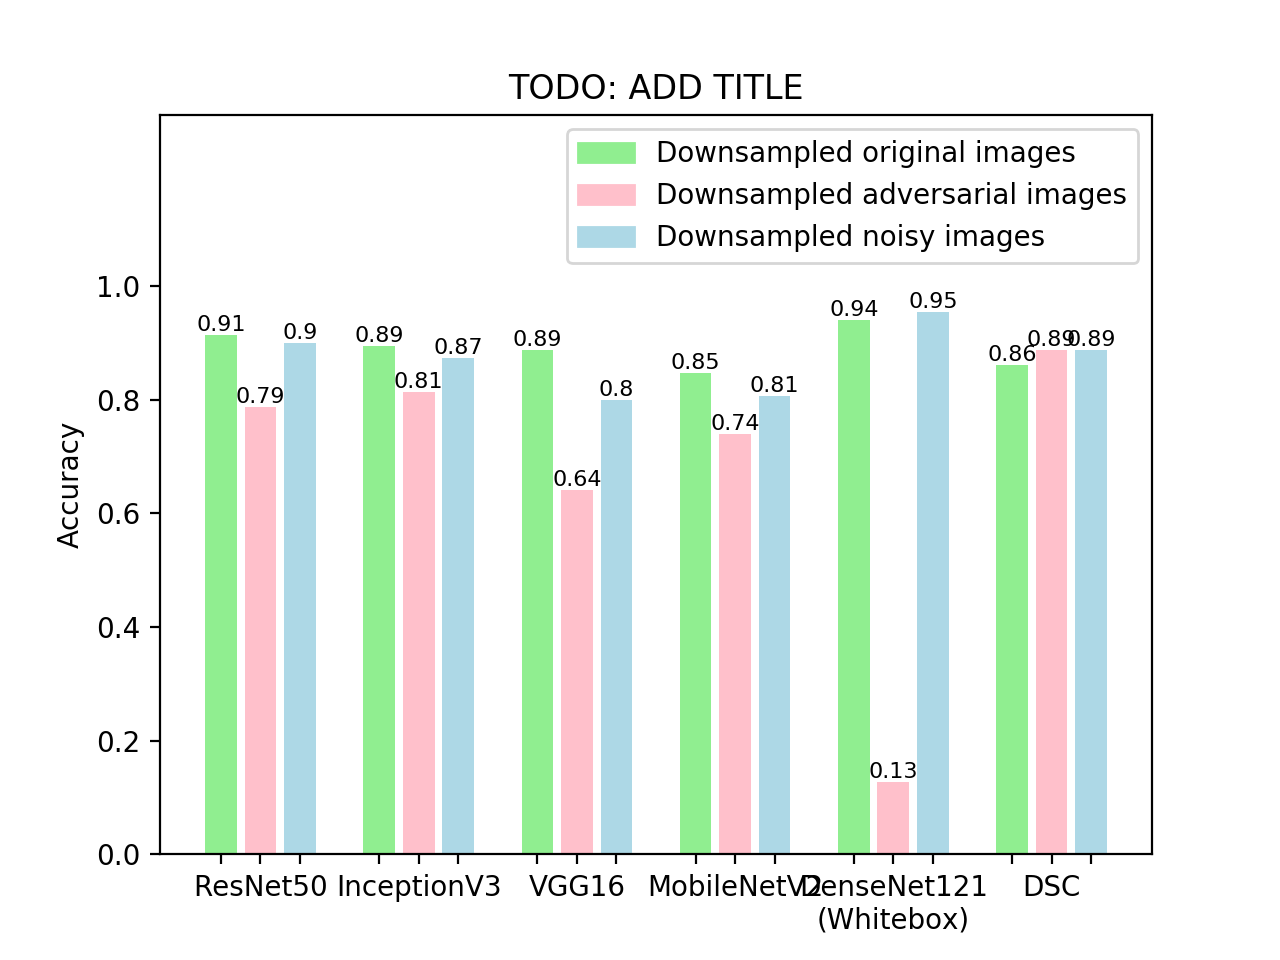

Text(0.5,1,'TODO: ADD TITLE')

In [69]:
fig, ax = plt.subplots()

all_data = np.array([0.9133333333333333,0.7866666666666666,0.9,0.8933333333333333,
                     0.8133333333333334,0.8733333333333333,0.8866666666666667,
                     0.64,0.8,0.8466666666666667,0.74,0.8066666666666666,
                     0.94,0.12666666666666668,0.9533333333333334,
                     0.86,0.8866666666666667,0.8866666666666667])

ind = np.arange(len(all_data))
for i in range(1, 6):
    ind[i*3:(i+1)*3] += i

bars = plt.bar(ind, all_data)
for i in range(6):
    b, a, n = bars[i*3:(i+1)*3]
    b.set_facecolor('lightgreen')
    a.set_facecolor('pink')
    n.set_facecolor('lightblue')
    
for rect in bars:
    height = rect.get_height()t
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '{:02}'.format(round(height * 100) / 100), ha='center', va='bottom', fontdict={'size': 8})
    
ax.set_yticks(np.arange(6) / 5)
ax.set_xticks(ind)
ax.set_xticklabels(['', 'ResNet50', '', 
                    '', 'InceptionV3', '',
                    '', 'VGG16', '', 
                    '', 'MobileNetV2', '', 
                    '', 'DenseNet121\n(Whitebox)', '',
                    '', 'DSC', ''])
plt.ylabel('Accuracy')

original_patch = mpatches.Patch(color='lightgreen', label='Downsampled original images')
adversarial_patch = mpatches.Patch(color='pink', label='Downsampled adversarial images')
noisy_patch = mpatches.Patch(color='lightblue', label='Downsampled noisy images')
plt.legend(handles=[original_patch, adversarial_patch, noisy_patch])
plt.ylim(0, 1.3)

plt.title('TODO: ADD TITLE')

Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done
Building frame lookup for sparse pvp file
Done


<IPython.core.display.Javascript object>


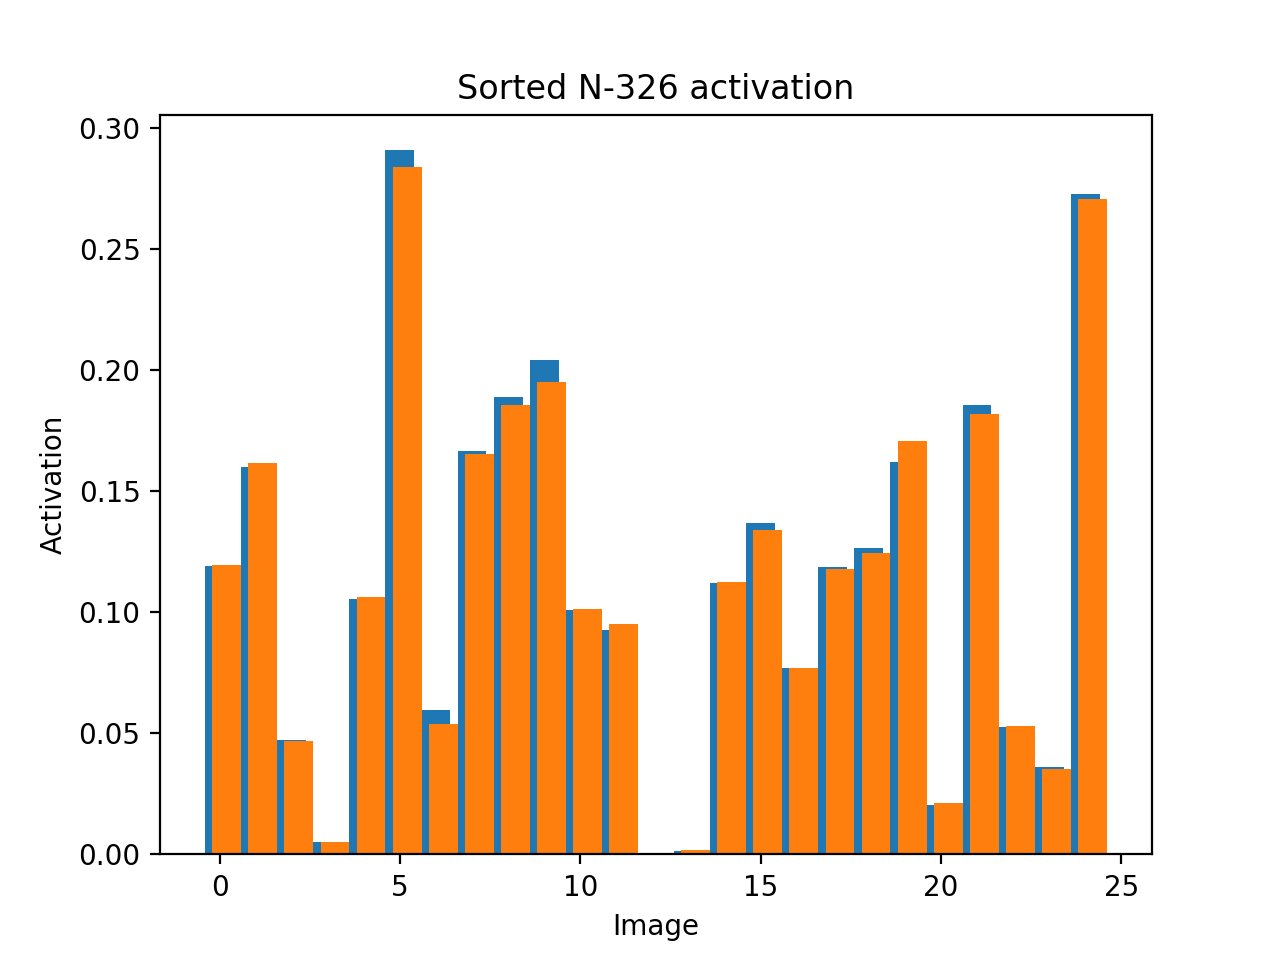

<IPython.core.display.Javascript object>


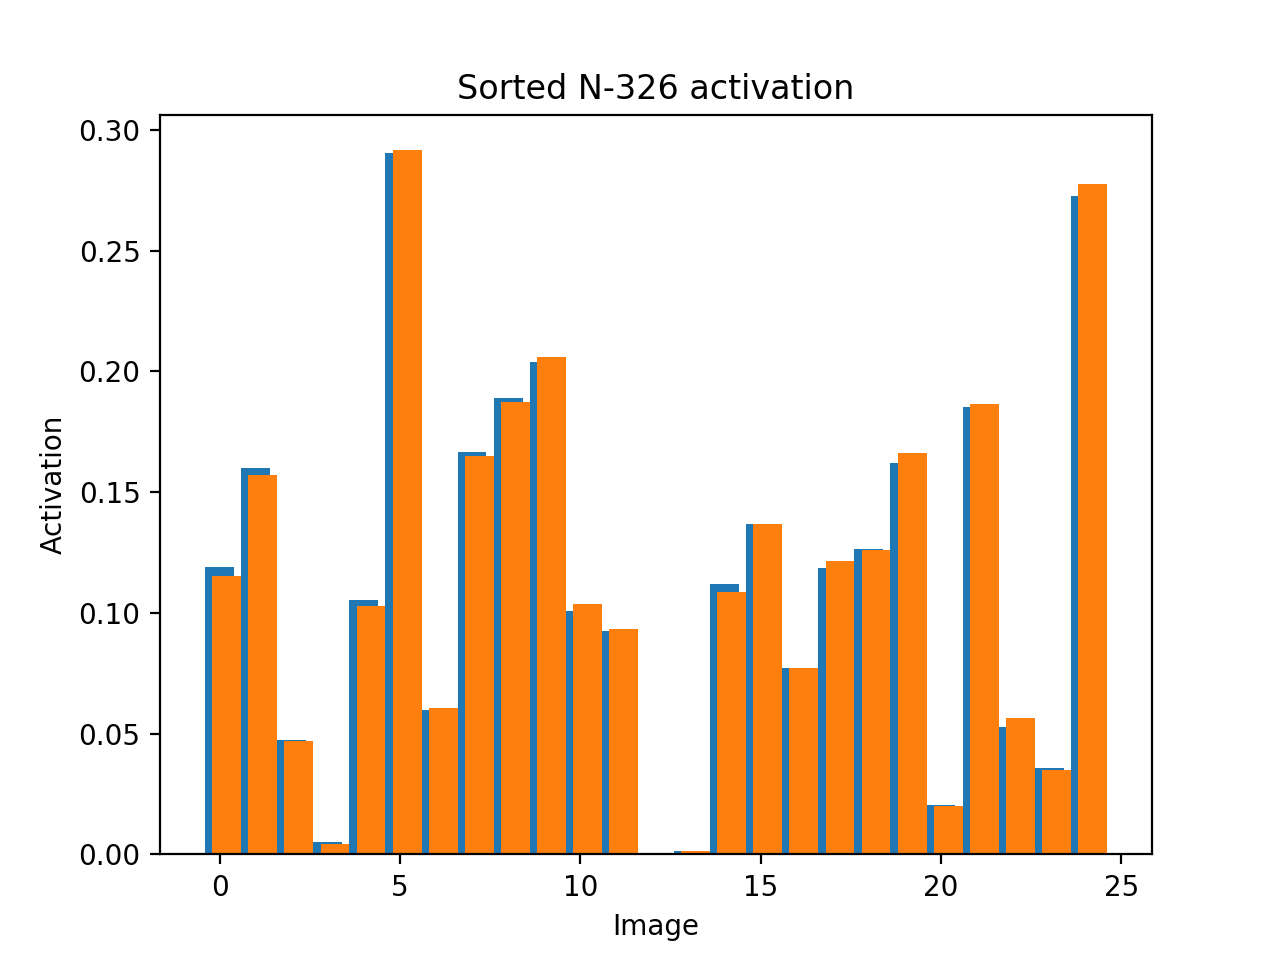

<IPython.core.display.Javascript object>


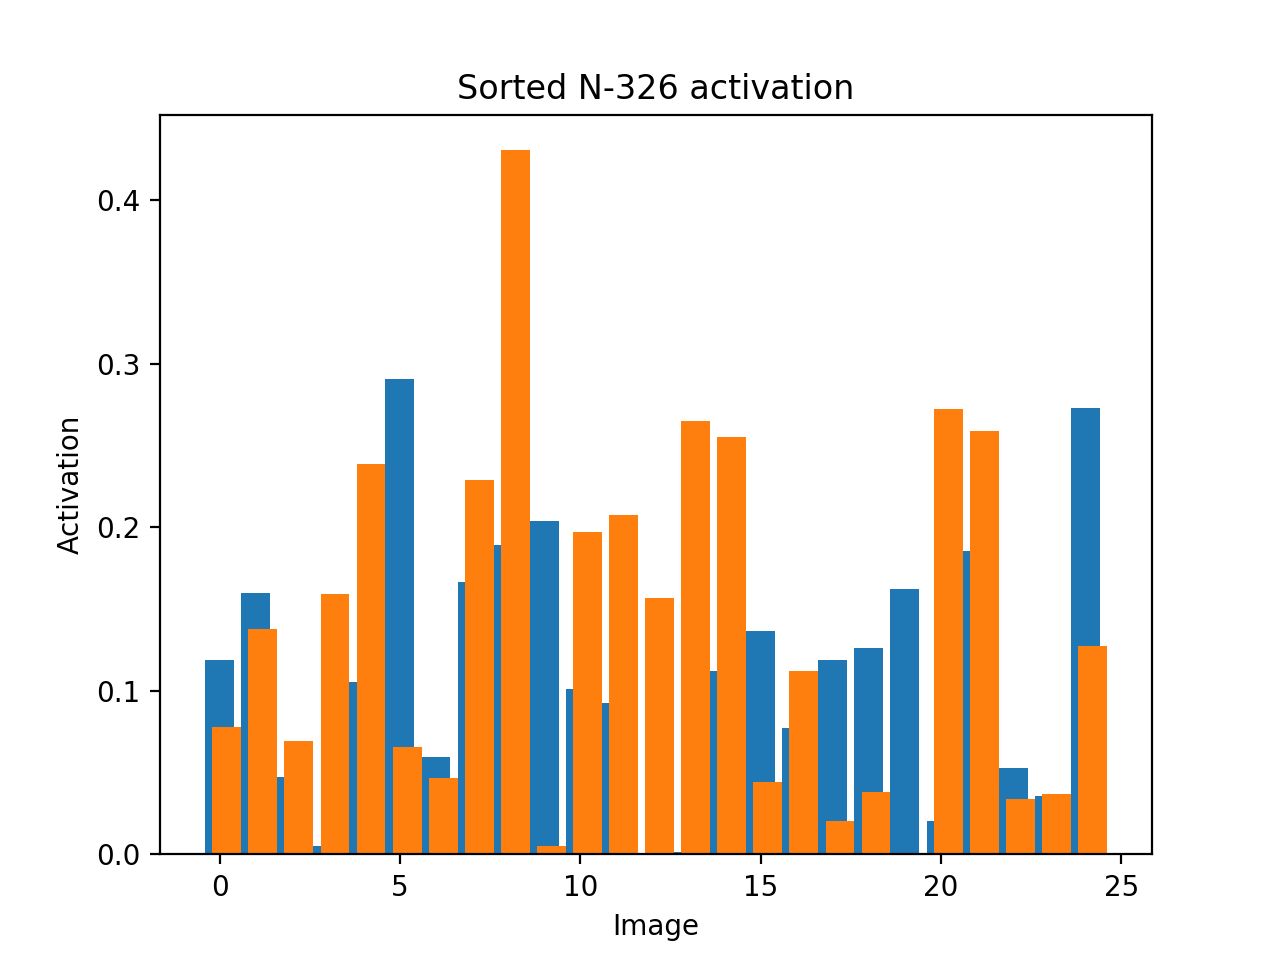

<IPython.core.display.Javascript object>


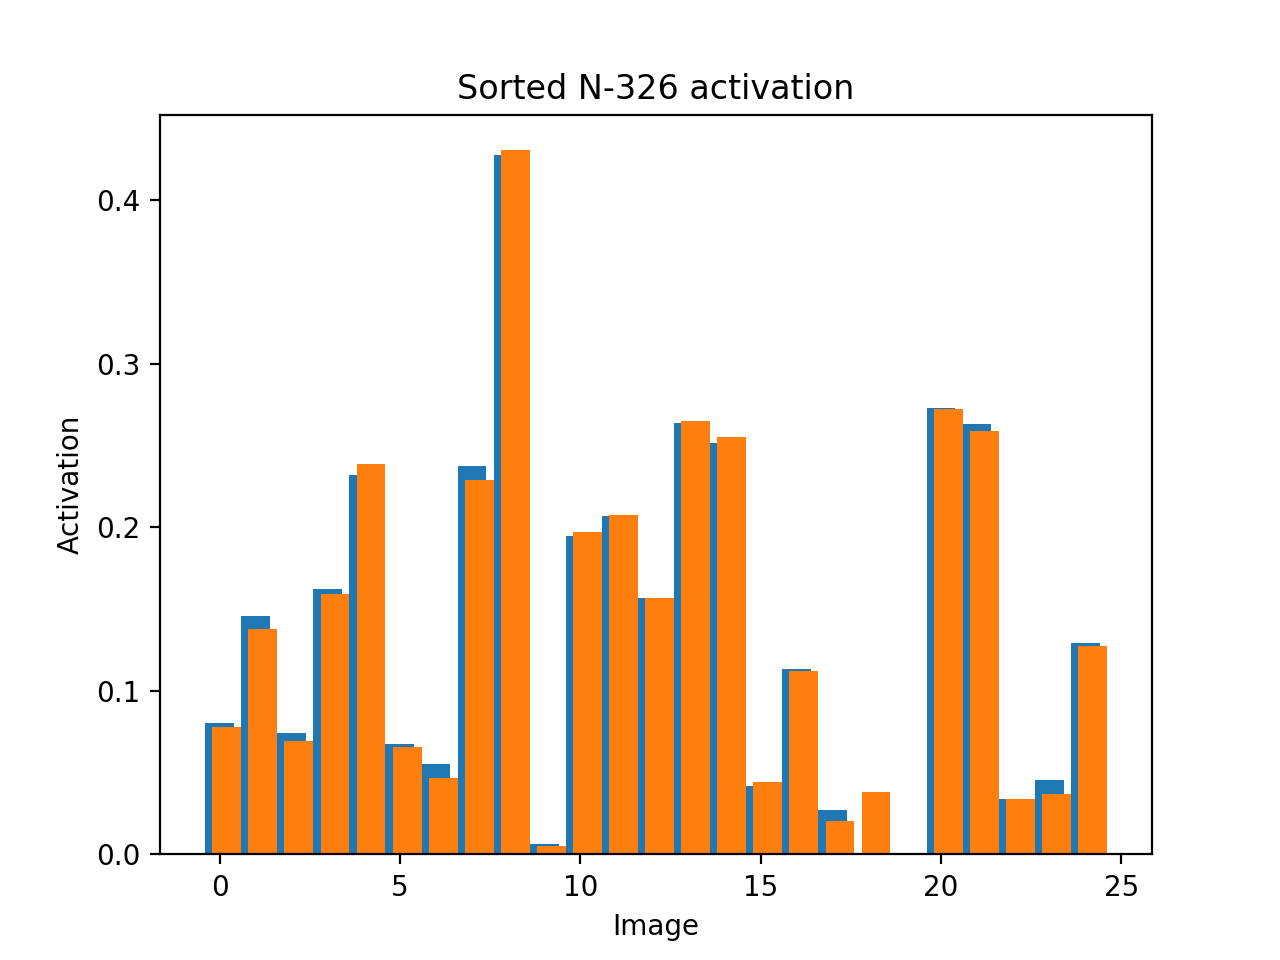

<IPython.core.display.Javascript object>


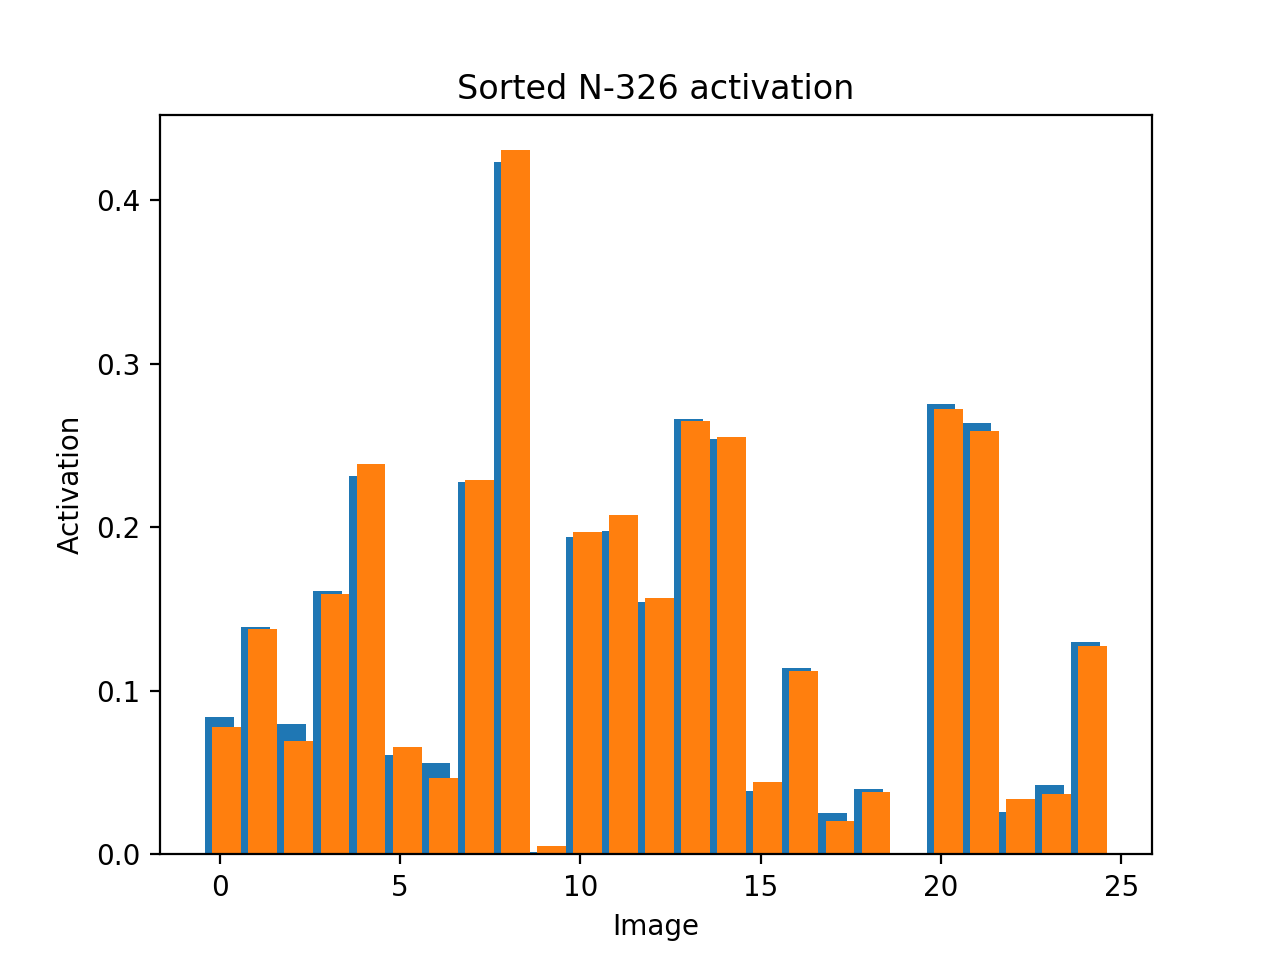

Text(0,0.5,'Activation')

In [91]:
%matplotlib notebook

def get_data(name):
    inputvision_lines = open('/home/jspringer/Workspace/LCAHalleBerry/' + name + '/timestamps/InputVision.txt').readlines()
    y = np.array([1 if '/2/' in line else 0 for line in inputvision_lines])
    
    data = pv.readpvpfile('/home/jspringer/Workspace/LCAHalleBerry/' + name + '/P1.pvp')
    X = data['values'].toarray()
    return X, y

def plot_comparison_sorted(data1_X, data2_X):
    ind = np.argsort(data1_X)
    plt.bar(np.arange(len(data1_X)), data1_X[ind])
    plt.bar(np.arange(len(data2_X))+0.2, data2_X[ind])
    
def plot_comparison(data1_X, data2_X):
    plt.bar(np.arange(len(data1_X)), data1_X)
    plt.bar(np.arange(len(data2_X))+0.2, data2_X)
    
X_benign, y_benign = get_data('output-benign')
X_adversarial, y_adversarial = get_data('output-adversarial')
X_noisy, y_noisy = get_data('output-noisy')
X_benign_downscale, y_benign_downscale = get_data('output-benign-downscale')
X_adversarial_downscale, y_adversarial_downscale = get_data('output-adversarial-downscale')
X_noisy_downscale, y_noisy_downscale = get_data('output-noisy-downscale')

plt.figure()
plot_comparison(X_benign[y_benign == 1][:, 326][:25], 
                       X_adversarial[y_adversarial == 1][:, 326][:25])

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

plt.figure()
plot_comparison(X_benign[y_benign == 1][:, 326][:25], 
                       X_noisy[y_noisy == 1][:, 326][:25])

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

plt.figure()
plot_comparison(X_benign[y_benign == 1][:, 326][:25], 
                       X_adversarial_downscale[y_adversarial_downscale == 1][:, 326][:25])

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

plt.figure()
plot_comparison(X_benign_downscale[y_benign_downscale == 1][:, 326][:25], 
                       X_adversarial_downscale[y_adversarial_downscale == 1][:, 326][:25])

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')

plt.figure()
plot_comparison(X_noisy_downscale[y_noisy_downscale == 1][:, 326][:25], 
                       X_adversarial_downscale[y_adversarial_downscale == 1][:, 326][:25])

plt.title('Sorted N-326 activation')
plt.xlabel('Image')
plt.ylabel('Activation')